## 畳み込み
---
### 1.1 畳み込みの使用方法
画像をテンソルとして扱う用意

In [126]:
#code1
import torch
import torchvision
from torchvision import transforms

image_size = 32
train_image_dir = "./data/train"
val_image_dir = "./data/val"

data_transfrom = {
    'train': transforms.Compose([transforms.RandomResizedCrop(image_size), 
                                 transforms.ToTensor()]),
    'val': transforms.Compose([transforms.RandomResizedCrop(image_size), 
                                 transforms.ToTensor()]),
}

tensor_train_dataset = torchvision.datasets.ImageFolder(
                            root=train_image_dir,
                            transform=data_transfrom["train"])
tensor_val_dataset = torchvision.datasets.ImageFolder(
                            root=val_image_dir,
                            transform=data_transfrom["val"])

img1_t, label = tensor_train_dataset[0]
print("type:{}, label:{}, shape:{}, dtype:{}".format(
                                                type(img1_t),
                                                label,
                                                img1_t.shape,
                                                img1_t.dtype))

type:<class 'torch.Tensor'>, label:0, shape:torch.Size([3, 32, 32]), dtype:torch.float32


PyTorchには1次元、2次元、3次元のデータを対象にした畳み込み処理が用意されている。今回の実験では画像(2次元)のデータを扱っているので nn.Conv2d を使用します。nn.Conv2d を用意するには3つの引数が最低限必要になる。1つ目は入力特徴量の数（フルカラー画像の場合はRGBの3チャネルなので3）、2つ目は出力特徴量の数、3つ目はカーネルサイズ

In [127]:
# code2
import torch.nn as nn

conv = nn.Conv2d(3, 16, kernel_size=3)
print(conv)

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))


In [128]:
#code3
print("weight: {}, bias: {}".format(conv.weight.shape, conv.bias.shape))

weight: torch.Size([16, 3, 3, 3]), bias: torch.Size([16])


In [129]:
#code4
img, label = tensor_train_dataset[0]
output = conv(img.unsqueeze(0))
print("img_shape: {}".format(img.unsqueeze(0).shape))
print("output_shape: {}".format(output.shape))

img_shape: torch.Size([1, 3, 32, 32])
output_shape: torch.Size([1, 16, 30, 30])


Text(0.5, 1.0, 'output')

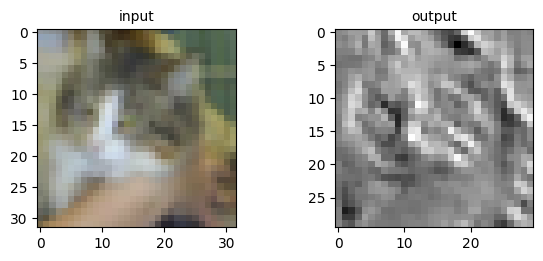

In [130]:
# code5
import matplotlib.pyplot as plt

fig = plt.figure()
plt.subplots_adjust(hspace=0.5, wspace=0.5)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.imshow(img.permute(1, 2, 0))
ax1.set_title("input", fontsize=10)
ax2.imshow(output[0, 2].detach(), cmap="gray")
ax2.set_title("output", fontsize=10)

Text(0.5, 1.0, 'output')

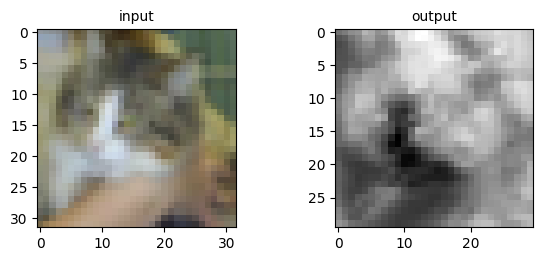

In [131]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.subplots_adjust(hspace=0.5, wspace=0.5)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.imshow(img.permute(1, 2, 0))
ax1.set_title("input", fontsize=10)
ax2.imshow(output[0, 9].detach(), cmap="gray")
ax2.set_title("output", fontsize=10)

In [132]:

conv2 = nn.Conv2d(3, 1, kernel_size=3, padding=1)
output2 = conv2(img.unsqueeze(0))
print("img_shap:{}".format(img.unsqueeze(0).shape))
print("output2_shape:{}".format(output2.shape))

img_shap:torch.Size([1, 3, 32, 32])
output2_shape:torch.Size([1, 1, 32, 32])


Text(0.5, 1.0, 'output2')

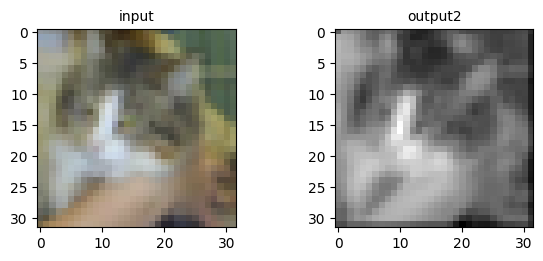

In [133]:
fig = plt.figure()
plt.subplots_adjust(hspace=0.5, wspace=0.5)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.imshow(img.permute(1, 2, 0))
ax1.set_title("input", fontsize=10)
ax2.imshow(output2[0, 0].detach(), cmap="gray")
ax2.set_title("output2", fontsize=10)

Text(0.5, 1.0, 'output3')

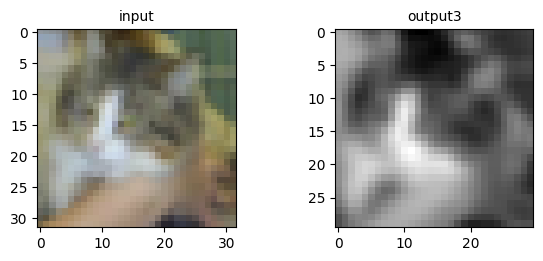

In [134]:
conv3 = nn.Conv2d(3, 16, kernel_size=3)

with torch.no_grad():
    conv3.bias.zero_()

with torch.no_grad():
    conv3.weight.fill_(1.0/9.0)

output3 = conv3(img.unsqueeze(0))

fig = plt.figure()
plt.subplots_adjust(hspace=0.5, wspace=0.5)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.imshow(img.permute(1, 2, 0))
ax1.set_title("input", fontsize=10)
ax2.imshow(output3[0, 0].detach(), cmap="gray")
ax2.set_title("output3", fontsize=10)


Text(0.5, 1.0, 'output4')

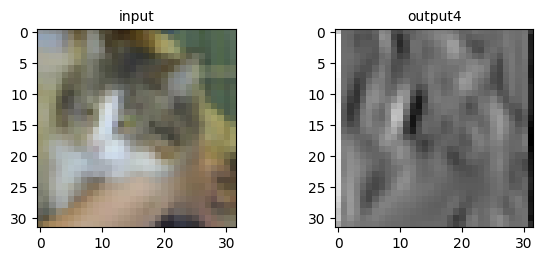

In [135]:
conv4 = nn.Conv2d(3, 1, kernel_size=3, padding=1)
with torch.no_grad():
    conv4.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                    [-1.0, 0.0, 1.0],
                                    [-1.0, 0.0, 1.0]])
    conv4.bias.zero_()

output4 = conv4(img.unsqueeze(0))

fig = plt.figure()
plt.subplots_adjust(hspace=0.5, wspace=0.5)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.imshow(img.permute(1, 2, 0))
ax1.set_title("input", fontsize=10)
ax2.imshow(output4[0, 0].detach(), cmap="gray")
ax2.set_title("output4", fontsize=10)

In [136]:
conv5 = nn.Conv2d(3, 1, kernel_size=3, padding=1)
with torch.no_grad():
    conv5.weight[:] = torch.tensor([[-1.0, -1.0, -1.0],
                                    [0.0, 0.0, 0.0],
                                    [1.0, 1.0, 1.0]])
    conv5.bias.zero_()

In [137]:
pool = nn.MaxPool2d(2)
output5 = pool(img.unsqueeze(0))
print("img_shap:{}".format(img.unsqueeze(0).shape))
print("output5_shape:{}".format(output5.shape))

img_shap:torch.Size([1, 3, 32, 32])
output5_shape:torch.Size([1, 3, 16, 16])


Text(0.5, 1.0, 'output5')

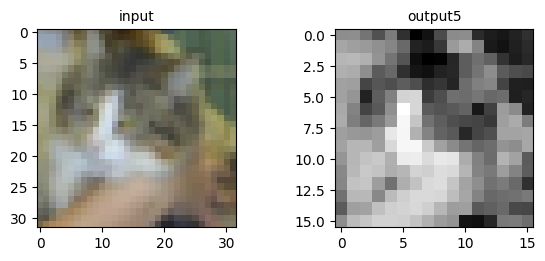

In [138]:
fig = plt.figure()
plt.subplots_adjust(hspace=0.5, wspace=0.5)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.imshow(img.permute(1, 2, 0))
ax1.set_title("input", fontsize=10)
ax2.imshow(output5[0, 0].detach(), cmap="gray")
ax2.set_title("output5", fontsize=10)

---
### モデルの構築

In [139]:
# cod13
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8*8*8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)
    
    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8*8*8)
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

In [140]:
# code14
import datetime

device = (torch.device("cuda") if torch.cuda.is_available()
          else torch.device("cpu"))
print(f"Training on device {device}.")

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs+1):
        # ローカル変数を初期化
        loss_train = 0.0
        total_correct = 0 # Accuracy計算用
        total_samples = 0

        for imgs, labels in train_loader:
            imgs = imgs.to(device = device)
            labels = labels.to(device = device)

            # モデルの予測
            outputs = model(imgs)

            # 損失を計算
            loss = loss_fn(outputs, labels)

            # 勾配を更新する
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # 損失の累積を取得する
            loss_train += loss.item()

            # 予測結果を取得する
            preds = outputs.argmax(dim=1)
            total_correct += (preds == labels).sum().item()
            total_samples += labels.size(0)
        
        accuracy = total_correct / total_samples
        loss = loss_train/len(train_loader)

        if epoch == 1 or epoch % 10 == 0:
            print("{} Epoch {}, Training loss {:2f}".format(
                                                        datetime.datetime.now(),
                                                        epoch, 
                                                        loss_train/len(train_loader)))
    return accuracy, loss

Training on device cuda.


In [141]:
# code15
import torch
import torch.optim.sgd
import torchvision
from torchvision import transforms

image_size = 32
mean = (0.5025, 0.4662, 0.4293)
std = (0.2446, 0.2340, 0.2356)
train_image_dir = "./data/train"
val_image_dir = "./data/val"

data_transfrom = {
    'train': transforms.Compose([transforms.RandomResizedCrop(image_size),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean, std)]),
    'val': transforms.Compose([transforms.RandomResizedCrop(image_size),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean, std)])
}

train_dataset = torchvision.datasets.ImageFolder(
                                        root=train_image_dir,
                                        transform=data_transfrom["train"])
val_dataset = torchvision.datasets.ImageFolder(
                                        root=val_image_dir,
                                        transform=data_transfrom["val"])

train_loader = torch.utils.data.DataLoader(
                                    train_dataset,
                                    batch_size=8,
                                    shuffle=True)

model = Net().to(device = device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(n_epochs=10,
              optimizer=optimizer,
              model=model,
              loss_fn=loss_fn,
              train_loader=train_loader)


2025-02-03 14:34:40.937988 Epoch 1, Training loss 0.689841
2025-02-03 14:34:42.823949 Epoch 10, Training loss 0.678999


(0.60625, 0.6789986342191696)

In [142]:
# code16
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=8, shuffle=False)

def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0
        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device = device)
                labels = labels.to(device = device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
            print("Accuracy {}: {:.2f}".format(name, correct/total))
    
validate(model, train_loader, val_loader)

Accuracy train: 0.60
Accuracy val: 0.50


epochを10, 20, 30と変化させた時の損失関数の値、train_acc, val_accを調査する

In [143]:
# Resarch about value of loss_fn, train_acc and val_acc
# Varying epochs 10, 20, 30
model = Net().to(device = device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

epoch_list = [10, 20, 30]

for i in epoch_list:
    training_loop(n_epochs=i,
                  optimizer=optimizer,
                  model=model,
                  loss_fn=loss_fn,
                  train_loader=train_loader)

    validate(model, train_loader, val_loader)

2025-02-03 14:34:43.277616 Epoch 1, Training loss 0.695597
2025-02-03 14:34:45.114888 Epoch 10, Training loss 0.680203
Accuracy train: 0.59
Accuracy val: 0.60
2025-02-03 14:34:45.552461 Epoch 1, Training loss 0.680183
2025-02-03 14:34:47.359428 Epoch 10, Training loss 0.673615
2025-02-03 14:34:49.428473 Epoch 20, Training loss 0.657240
Accuracy train: 0.60
Accuracy val: 0.38
2025-02-03 14:34:49.854132 Epoch 1, Training loss 0.664757
2025-02-03 14:34:51.597889 Epoch 10, Training loss 0.651553
2025-02-03 14:34:53.563264 Epoch 20, Training loss 0.638661
2025-02-03 14:34:55.565048 Epoch 30, Training loss 0.629376
Accuracy train: 0.63
Accuracy val: 0.57


## 2. 複雑なモデル
---
### 2.1 記憶容量の追加

In [144]:
# code17
class NetWidth(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(16*8*8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 16*8*8)
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

In [145]:
# NetWidht()の学習(epoch=10, 20, 30)
# Resarch about value of loss function, train_acc and val_acc.

# Resarch about value of loss_fn, train_acc and val_acc
# Varying epochs 10, 20, 30
model = NetWidth().to(device = device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

epoch_list = [10, 20, 30]

for i in epoch_list:
    training_loop(n_epochs=i,
                  optimizer=optimizer,
                  model=model,
                  loss_fn=loss_fn,
                  train_loader=train_loader)

    validate(model, train_loader, val_loader)

2025-02-03 14:34:56.018258 Epoch 1, Training loss 0.696518
2025-02-03 14:34:57.819429 Epoch 10, Training loss 0.661289
Accuracy train: 0.57
Accuracy val: 0.50
2025-02-03 14:34:58.231652 Epoch 1, Training loss 0.681066
2025-02-03 14:34:59.987524 Epoch 10, Training loss 0.664338
2025-02-03 14:35:01.887606 Epoch 20, Training loss 0.647139
Accuracy train: 0.62
Accuracy val: 0.53
2025-02-03 14:35:02.307733 Epoch 1, Training loss 0.644351
2025-02-03 14:35:04.101284 Epoch 10, Training loss 0.643197
2025-02-03 14:35:06.042037 Epoch 20, Training loss 0.643237
2025-02-03 14:35:08.022558 Epoch 30, Training loss 0.626782
Accuracy train: 0.72
Accuracy val: 0.47


In [146]:
import matplotlib.pyplot as plt
import numpy as np



---
### 2.2 L2正規化

In [147]:
# code18
def training_loop_l2reg(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs+1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device = device)
            labels = labels.to(device = device)
            outputs = model(imgs)
            loss  = loss_fn(outputs, labels)
            # -- l2reg --
            l2_lambda = 0.001
            l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
            loss = loss + l2_lambda * l2_norm
            # -- l2reg --
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print("{} Epoch {}, Training loss {:2f}".format(
                                                        datetime.datetime.now(),
                                                        epoch,
                                                        loss_train/len(train_loader)))
    return loss_train/len(train_loader)

In [170]:
# Net(), NetWidht()をcode18を使用してが学習(epoch=30)
# Resarch about effect of L2 normalization
n_epochs = 30
Net_l2_loss = training_loop_l2reg(30, optimizer, Net().to(device = device), loss_fn, train_loader)
NetWidth_l2_loss = training_loop_l2reg(30, optimizer, NetWidth().to(device = device), loss_fn, train_loader)
# Net_l2_acc = training_loop_l2reg(30, optimizer, Net(), loss_fn, train_loader)
# NetWidth_l2_acc = training_loop_l2reg(30, optimizer, NetWidth(), loss_fn, train_loader)

2025-02-03 15:32:59.185581 Epoch 1, Training loss 0.716999
2025-02-03 15:33:01.086607 Epoch 10, Training loss 0.716840
2025-02-03 15:33:03.218364 Epoch 20, Training loss 0.719166
2025-02-03 15:33:05.286789 Epoch 30, Training loss 0.723836
2025-02-03 15:33:05.489752 Epoch 1, Training loss 0.725525
2025-02-03 15:33:07.347392 Epoch 10, Training loss 0.725646
2025-02-03 15:33:09.463250 Epoch 20, Training loss 0.725653
2025-02-03 15:33:11.560361 Epoch 30, Training loss 0.723868


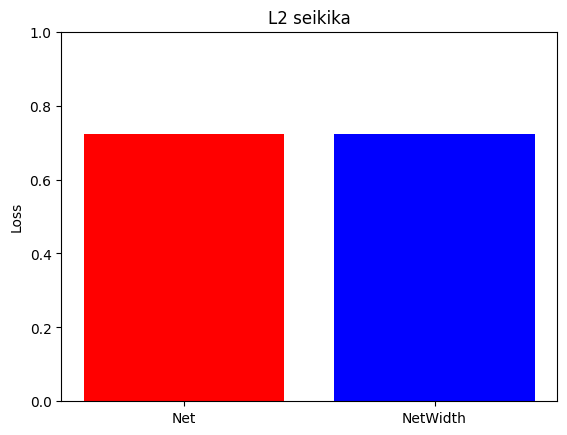

In [171]:
import matplotlib.pyplot as plt
import numpy as np

models = ["Net", "NetWidth"]
accuracy = [Net_l2_loss, NetWidth_l2_loss]
plt.bar(models, accuracy, color=["r", "b"])
plt.ylabel("Loss")
plt.ylim(0, 1.0)
plt.title("L2 seikika")
plt.show()

---
### 2.2 ドロップアウト

In [150]:
# code19
class NetDropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv1_dropout = nn.Dropout2d(p=0.4)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.conv2_dropout = nn.Dropout2d(p=0.4)
        self.fc1 = nn.Linear(16*8*8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.conv1_dropout(out)
        out = self.pool2(self.act2(self.conv2(out)))
        out = self.conv2_dropout(out)
        out = out.view(-1, 16*8*8)
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

In [151]:
# NetDropout()の学習(epoch=30)
# use training_loop() from code14
# Resarch about Accuracy

NetDropout_acc, NetDropout_loss = training_loop(30, optimizer, NetDropout().to(device = device), loss_fn, train_loader)

2025-02-03 14:35:21.204808 Epoch 1, Training loss 0.686796
2025-02-03 14:35:23.076021 Epoch 10, Training loss 0.698302
2025-02-03 14:35:25.146806 Epoch 20, Training loss 0.696897
2025-02-03 14:35:27.197588 Epoch 30, Training loss 0.699462


In [161]:
model = NetDropout().to(device = device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(n_epochs=30,
              optimizer=optimizer,
              model=model,
              loss_fn=loss_fn,
              train_loader=train_loader)

validate(model, train_loader, val_loader)

2025-02-03 15:18:35.510124 Epoch 1, Training loss 0.697503
2025-02-03 15:18:37.290325 Epoch 10, Training loss 0.678650
2025-02-03 15:18:39.306508 Epoch 20, Training loss 0.666839
2025-02-03 15:18:41.292429 Epoch 30, Training loss 0.683388
Accuracy train: 0.59
Accuracy val: 0.45


---
### 2.3 バッチ正規化

In [152]:
class NetBatchNorm(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features=32)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features=16)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(16*8*8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.conv1_batchnorm(self.conv1(x))
        out = self.pool1(self.act1(out))
        out = self.conv2_batchnorm(self.conv2(out))
        out = self.pool2(self.act2(out))
        out = out.view(-1, 16*8*8)
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

In [164]:
# NetBatchNorm()の学習(epoch=30)
# use training_loop() from code14
# Resarch about Accuracy
model = NetBatchNorm().to(device = device)

NetBatchNorm_acc, NetBatchNorm_loss = training_loop(30, optimizer, NetBatchNorm().to(device = device), loss_fn, train_loader)
validate(model, train_loader, val_loader)

2025-02-03 15:20:24.990515 Epoch 1, Training loss 0.688195
2025-02-03 15:20:26.826495 Epoch 10, Training loss 0.711814
2025-02-03 15:20:28.844291 Epoch 20, Training loss 0.696511
2025-02-03 15:20:30.888721 Epoch 30, Training loss 0.702235
Accuracy train: 0.51
Accuracy val: 0.50


---
### 2.4 深いネットワーク

In [154]:
class NetDepth(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.conv3 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act3 = nn.Tanh()
        self.pool3 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8*4*4, 32)
        self.act4 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = self.pool3(self.act3(self.conv3(out)))
        out = out.view(-1, 8*4*4)
        out = self.act4(self.fc1(out))
        out = self.fc2(out)
        return out

In [165]:
# NetDepth()の学習(epoch=30)
# use training_loop() from code14
# Resarch about Accuracy
model = NetDepth().to(device = device)

NetDepth_acc, NetDepth_loss = training_loop(30, optimizer, NetDepth().to(device = device), loss_fn, train_loader)
validate(model, train_loader, val_loader)

2025-02-03 15:21:14.662108 Epoch 1, Training loss 0.694239
2025-02-03 15:21:16.477453 Epoch 10, Training loss 0.694168
2025-02-03 15:21:18.486628 Epoch 20, Training loss 0.694239
2025-02-03 15:21:20.499945 Epoch 30, Training loss 0.691911
Accuracy train: 0.50
Accuracy val: 0.50


---
### 2.5 スキップ接続

In [156]:
class NetRes(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.act1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        self.act2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2)
        self.conv3 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.act3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(16*4*4, 32)
        self.act4 = nn.ReLU()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out1 = out
        out = self.pool3(self.act3(self.conv3(out)) + out1)
        out = out.view(-1, 16*4*4)
        out = self.act4(self.fc1(out))
        out = self.fc2(out)
        return out

In [167]:
# NetRes()の学習(epoch=30)
# use training_loop() from code14
# Resarch about Accuracy
model = NetRes().to(device = device)

NetRes_acc, NetRes_loss = training_loop(30, optimizer, NetRes().to(device = device), loss_fn, train_loader)
validate(model, train_loader, val_loader)

2025-02-03 15:22:12.206092 Epoch 1, Training loss 0.697719
2025-02-03 15:22:14.040861 Epoch 10, Training loss 0.694143
2025-02-03 15:22:16.073963 Epoch 20, Training loss 0.695696
2025-02-03 15:22:18.082859 Epoch 30, Training loss 0.695790
Accuracy train: 0.54
Accuracy val: 0.50


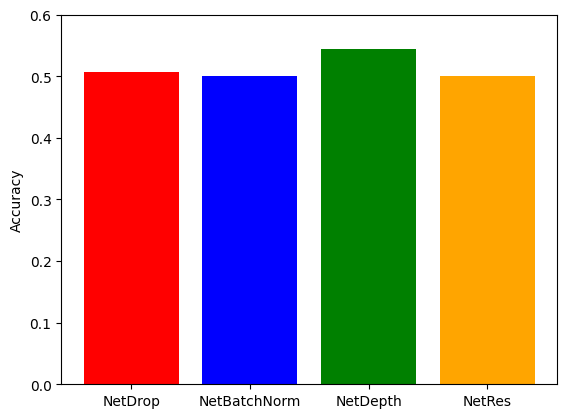

In [168]:
import matplotlib.pyplot as plt
import numpy as np

models = ["NetDrop", "NetBatchNorm", "NetDepth", "NetRes"]
accuracy = [NetDropout_acc, NetBatchNorm_acc, NetDepth_acc, NetRes_acc]

plt.bar(models, accuracy, color=["red", "blue", "green", "orange"])
plt.ylabel("Accuracy")
# plt.title
plt.ylim(0, 0.6)
plt.show()

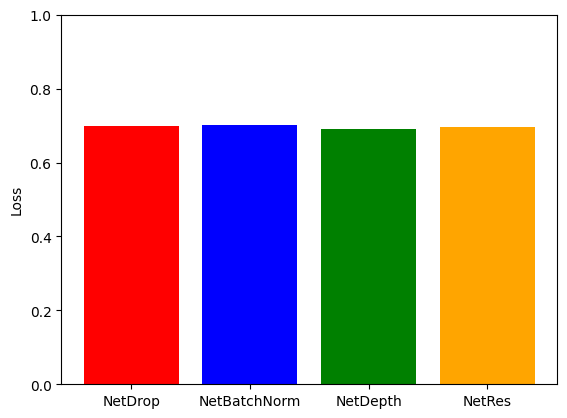

In [169]:
import matplotlib.pyplot as plt
import numpy as np

models = ["NetDrop", "NetBatchNorm", "NetDepth", "NetRes"]
accuracy = [NetDropout_loss, NetBatchNorm_loss, NetDepth_loss, NetRes_loss]

plt.bar(models, accuracy, color=["red", "blue", "green", "orange"])
plt.ylabel("Loss")
# plt.title
plt.ylim(0, 1.0)
plt.show()